In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

random_state=42
target = 'language'

In [2]:
url = './data.csv'
df0 = pd.read_csv(url)

In [3]:
print(f' Data frame has {df0.shape[0]} samples, and {df0.shape[1]-1} features ')

 Data frame has 329 samples, and 12 features 


In [8]:
df0.head()

language         X1        X2        X3         X4        X5         X6  \
0       ES   7.071476 -6.512900  7.650800  11.150783 -7.657312  12.484021   
1       ES  10.982967 -5.157445  3.952060  11.529381 -7.638047  12.136098   
2       ES   7.827108 -5.477472  7.816257   9.187592 -7.172511  11.715299   
3       ES   6.744083 -5.688920  6.546789   9.000183 -6.924963  11.710766   
4       ES   5.836843 -5.326557  7.472265   8.847440 -6.773244  12.677218   

          X7        X8        X9       X10       X11       X12  
0 -11.709772  3.426596  1.462715 -2.812753  0.866538 -5.244274  
1 -12.036247  3.491943  0.595441 -4.508811  2.332147 -6.221857  
2 -13.847214  4.574075 -1.687559 -7.204041 -0.011847 -6.463144  
3 -12.374388  6.169879 -0.544747 -6.019237  1.358559 -6.356441  
4 -12.315061  4.416344  0.193500 -3.644812  2.151239 -6.816310

In [9]:
df0.describe()

X1          X2          X3          X4          X5          X6  \
count  329.000000  329.000000  329.000000  329.000000  329.000000  329.000000   
mean     5.645227   -4.270814    2.635319    7.200207   -5.648733    9.810236   
std      5.105302    3.514350    3.635323    4.310095    4.596180    3.624654   
min     -6.067831  -14.972962   -6.186583   -8.844231  -15.656596   -3.528964   
25%      2.065603   -6.515764    0.137042    4.700874   -8.417684    8.643563   
50%      4.954206   -4.252512    2.029268    7.804680   -6.786670   10.379330   
75%      9.793648   -1.560250    4.178026   10.129165   -4.463308   11.784360   
max     17.749851    3.570765   17.066487   16.178942    7.912809   21.445837   

               X7          X8          X9         X10         X11         X12  
count  329.000000  329.000000  329.000000  321.000000  329.000000  329.000000  
mean    -9.408053    5.117328   -1.229432   -2.411215    2.430833   -3.980415  
std      2.484117    2.650608    3.634849    5.027840    3.478467    2.985879  
min    -15.365665   -2.873862  -15.510974  -11.429178  -13.664104  -13.724103  
25%    -11.120860    3.482167   -1.749082   -5.090180    1.197789   -5.941409  
50%     -9.710399    4.843103   -0.389970   -3.327718    3.169703   -4.374334  
75%     -7.989370    6.588931    0.779993   -1.512083    4.673452   -2.191658  
max     -0.424033   13.846083    4.789989   16.326455    9.166066    5.259430

In [11]:
print(f'Missing Values per columns: \n{df0.isna().sum()}')

Missing Values per columns: 
language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         8
X11         0
X12         0
dtype: int64


<Axes: xlabel='language'>

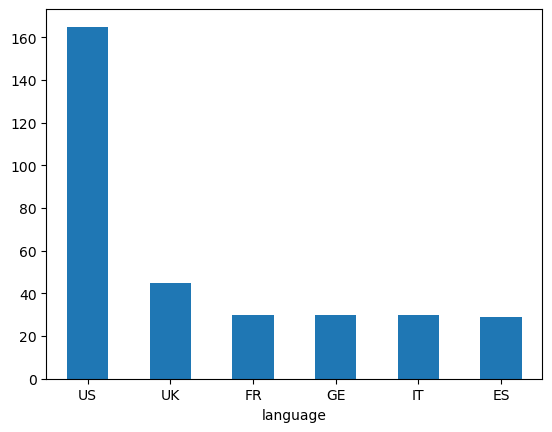

In [7]:
df0[target].value_counts().plot(kind='bar',rot=0)

<Axes: >

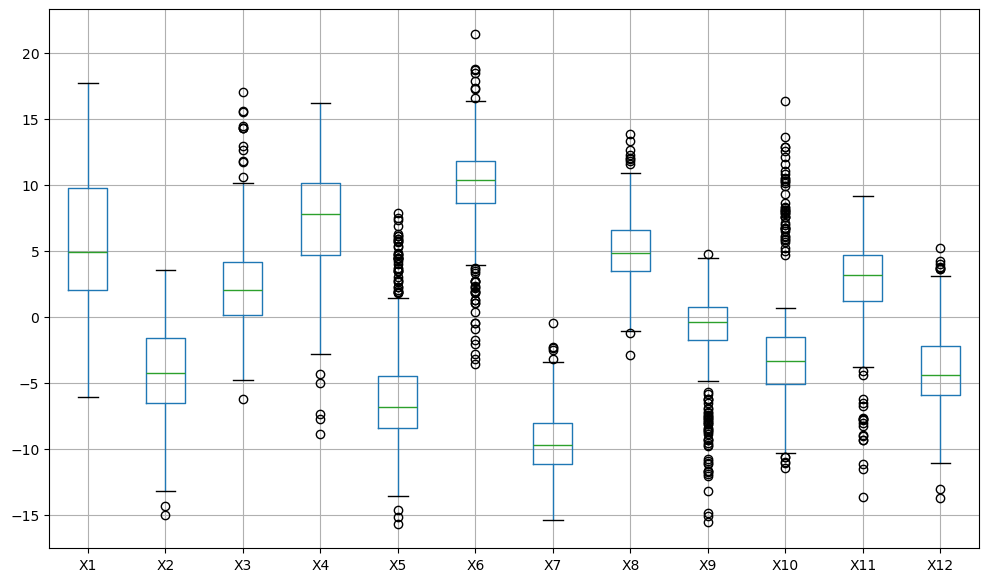

In [13]:
df0.boxplot(figsize=(12,7))

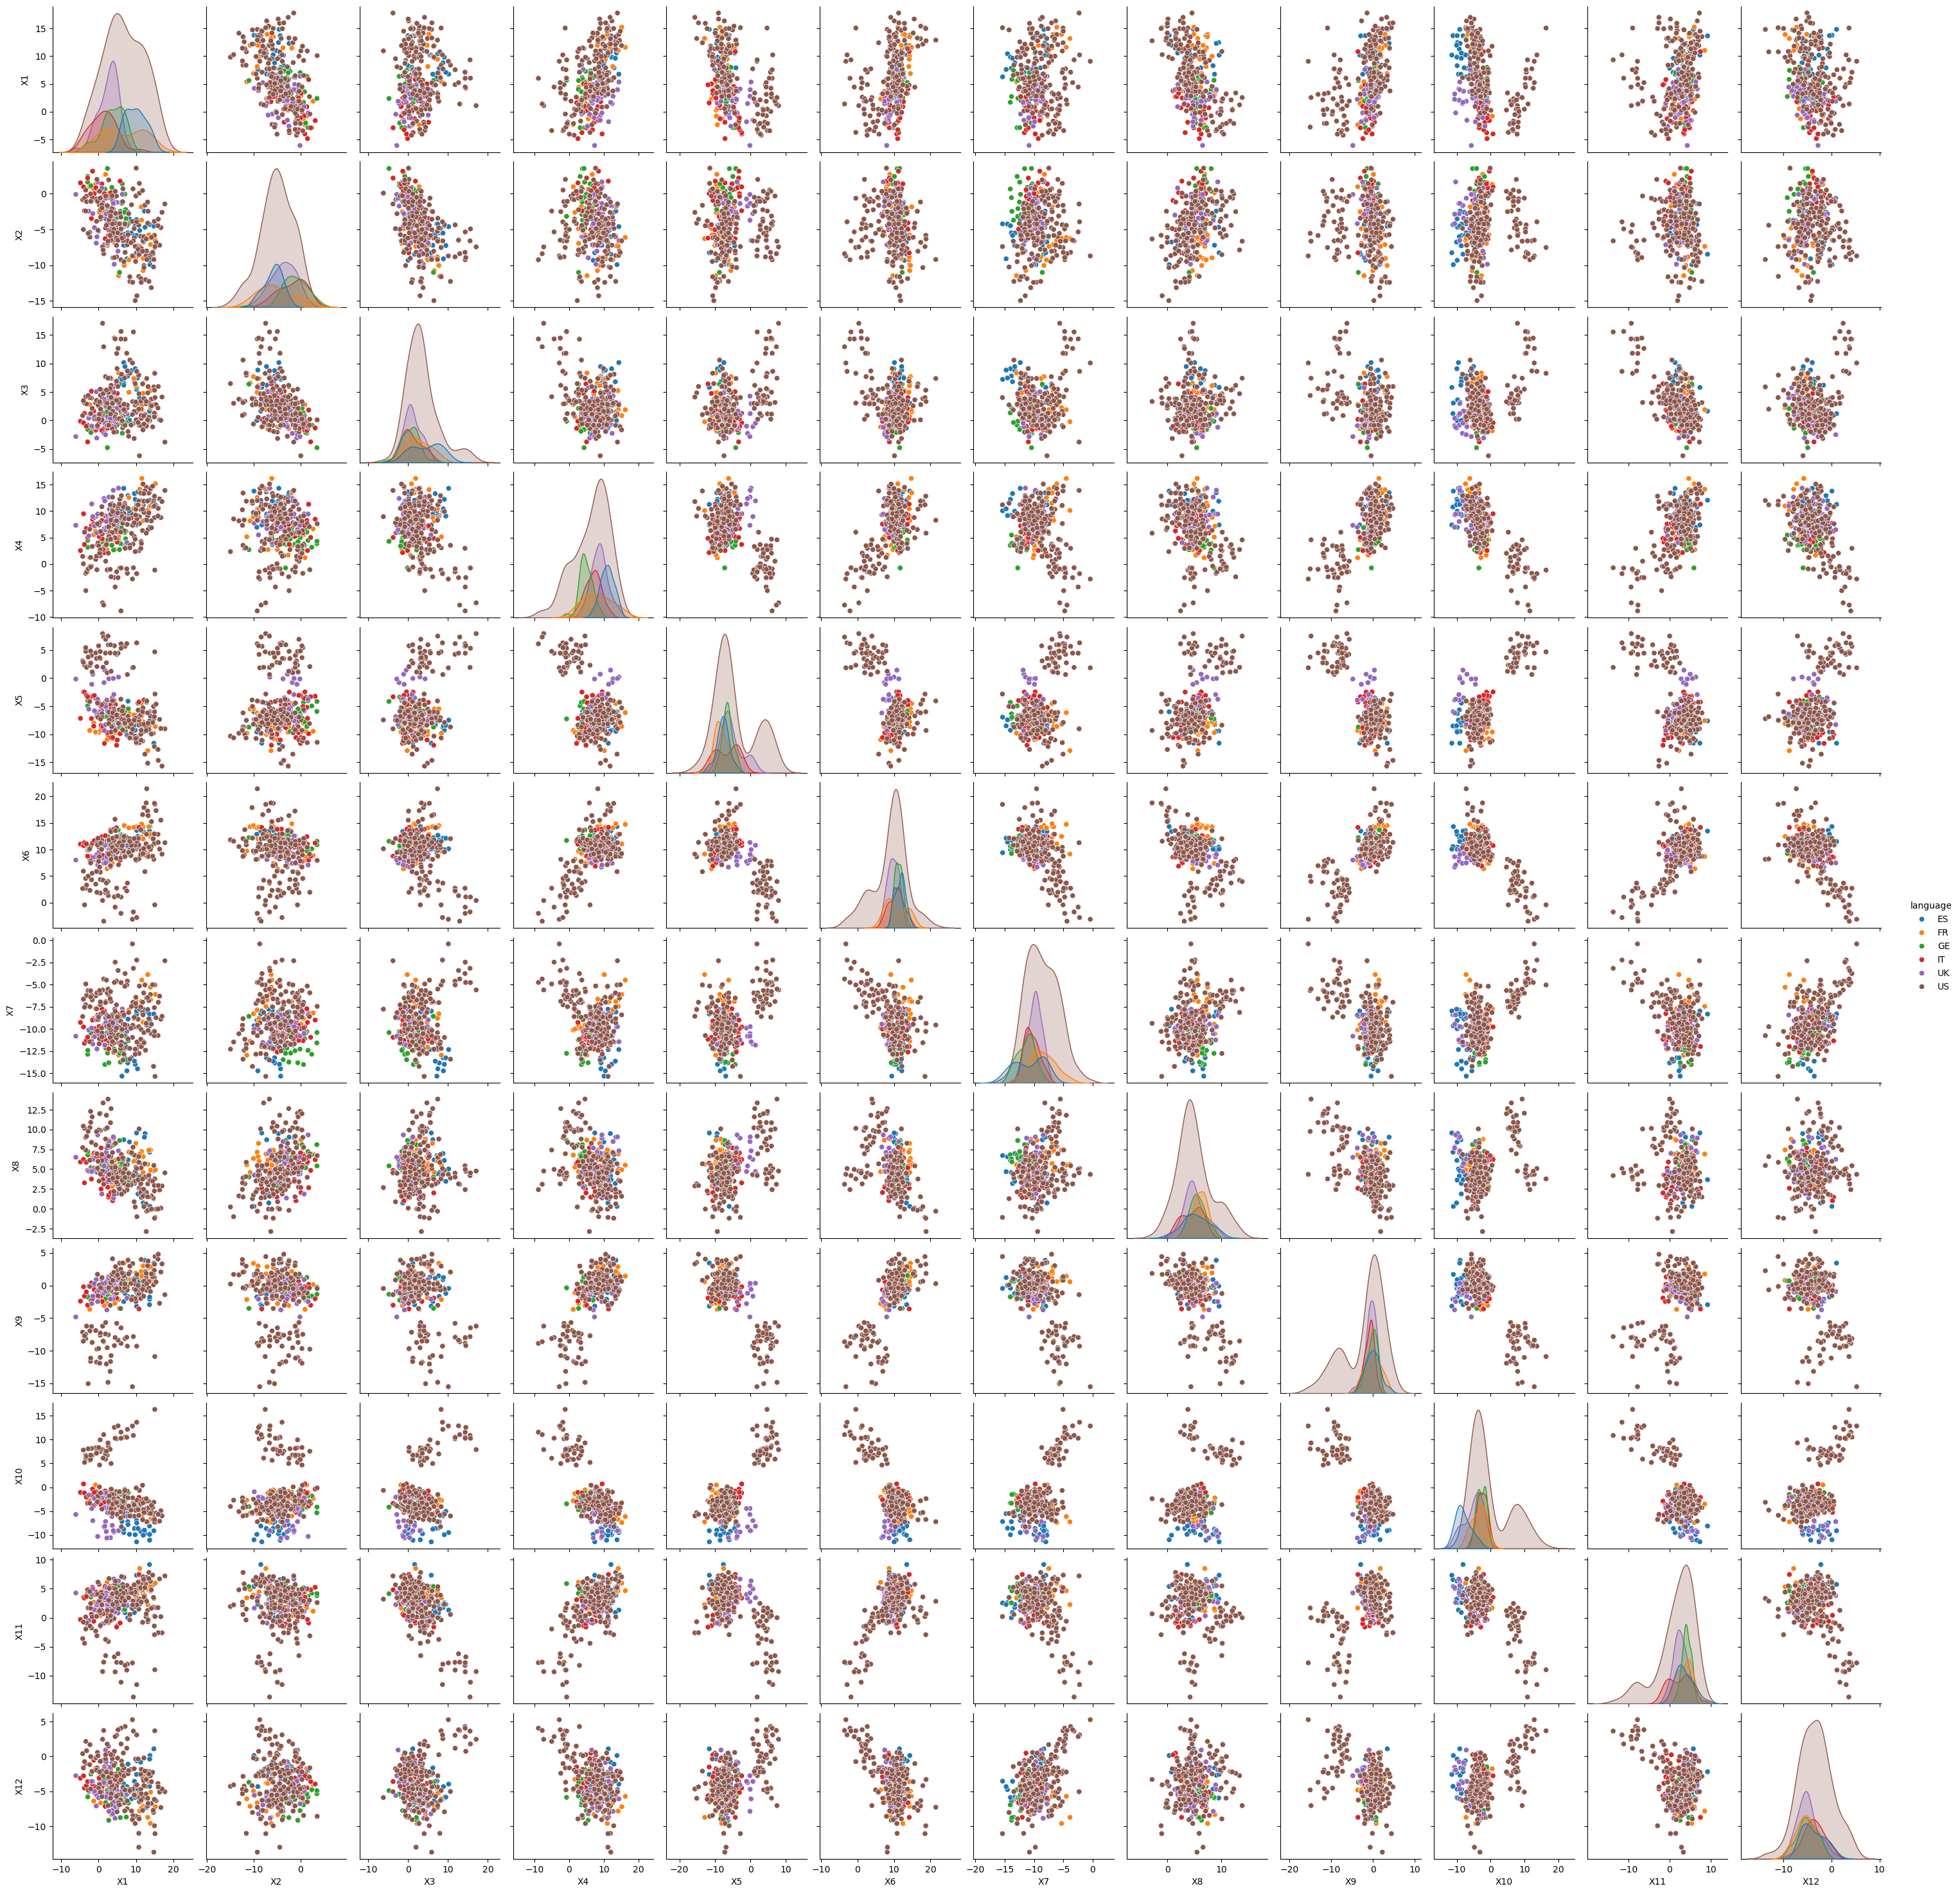

In [14]:
sns.pairplot(df0,hue=target)
plt.show()

In [17]:
print(f'there are {df0.isna().sum().sum()} rows with null values')
df1 = df0.dropna()
print(f'there are {df1.isna().sum().sum()} rows with null values')
print(f'Data frame has {df1.shape[0]} samples, and {df1.shape[1]-1} features ')


there are 8 rows with null values
there are 0 rows with null values
Data frame has 329 samples, and 12 features 


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df1[target])
X = df1.drop([target],axis=1)

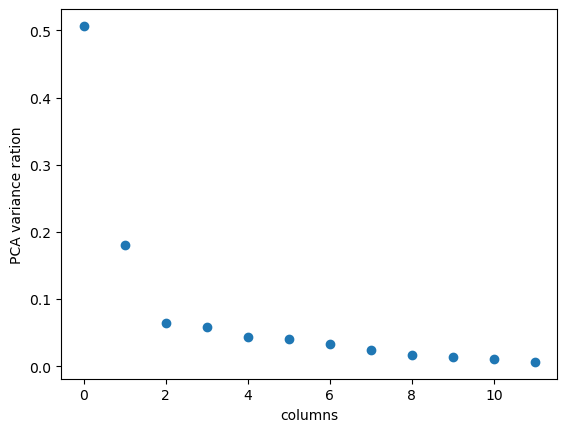

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_traformed = pca.fit_transform(X)
plt.scatter(range(X.shape[1]), pca.explained_variance_ratio_)
plt.ylabel('PCA variance ration')
plt.xlabel('columns')
plt.show()




In [25]:
pca.explained_variance_ratio_

array([0.50663685, 0.17998815, 0.06411371, 0.05862184, 0.04351558,
       0.04078551, 0.03322924, 0.02431428, 0.01722903, 0.01422502,
       0.0109414 , 0.00639938])

the PC with less variance ratio is at 0,6% that is not too small. and we have few feature so there is no need to reduce the dimensions

In [30]:
min_variance = 0.99

variance_cumsum = np.cumsum(pca.explained_variance_ratio_.copy())
cutoff_index = np.argmax(variance_cumsum>min_variance)
# X = X_traformed[:,:cutoff_index+1]  

variance_cumsum


array([0.50663685, 0.68662501, 0.75073871, 0.80936056, 0.85287614,
       0.89366165, 0.92689089, 0.95120517, 0.9684342 , 0.98265922,
       0.99360062, 1.        ])

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state, train_size=0.67)

print(f'{X_train.shape[0]} samples in train set, {X_test.shape[0]} samples in test set')

215 samples in train set, 106 samples in test set


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_lbls = [
    'dt',
    'rf'
]

models = {
    'dt':{
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier(random_state=random_state),
        'param':[{
            'max_depth':[*range(1,20)],
            'class_weight':[None, 'balanced']
        }]
    },

    'rf':{
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(random_state=random_state),
        'param':[{
            'max_depth':[*range(4,30,4)],
            'class_weight': [None, 'balanced'],
            'n_estimators': [*range(20,50,5)]
        }]
    }
}

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


score = 'recall_macro'
clfs = []
results = pd.DataFrame([],columns=['Model','best-parameter','accuracy','f1-score','precision','recall'])

for m in model_lbls:
    clf = GridSearchCV(
        estimator=models[m]['estimator'],
        param_grid=models[m]['param'],
        scoring=score,
        cv=3
    )
    clf.fit(X_train,y_train)
    clfs.append(clf)
    y_pred = clf.predict(X_test)
    clf_report = classification_report(y_test,y_pred,zero_division=1,output_dict=True)

    results.loc[len(results)]=[
        models[m]['name'],
        clf.best_params_,
        clf_report['accuracy'],
        clf_report['macro avg']['f1-score'],
        clf_report['macro avg']['precision'],
        clf_report['macro avg']['recall'],
    ]

In [43]:
display(
    results.sort_values(by='recall', ascending=False)
)


Model                                     best-parameter  accuracy  \
1  Random Forest  {'class_weight': 'balanced', 'max_depth': 4, '...  0.698113   
0  Decision Tree       {'class_weight': 'balanced', 'max_depth': 8}  0.632075   

   f1-score  precision    recall  
1  0.674912   0.646422  0.725796  
0  0.551662   0.586006  0.565796

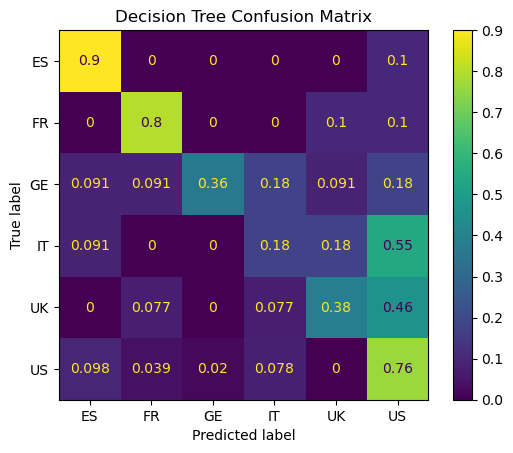

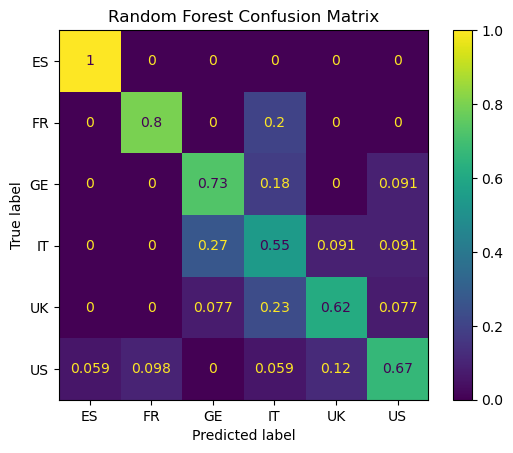

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

for idx,m in enumerate(model_lbls):
    disp = ConfusionMatrixDisplay.from_estimator(
        estimator=clfs[idx], X=X_test, y=y_test, normalize='true', display_labels=le.classes_
    )
    disp.ax_.set_title(f'{models[m]['name']} Confusion Matrix')